<a href="https://colab.research.google.com/github/yuseongil034/yuseongil/blob/main/0703_python_numpy%EC%9C%B5%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose simulation mode:
1. Interactive mode (press Enter after each step)
2. Automatic mode (all steps shown automatically)
=== Showing All Steps Automatically ===
Goal: Reach y-coordinate 9
Each step will be displayed for 2 seconds

GOAL REACHED at position (1, 9)!
Showing Step 1


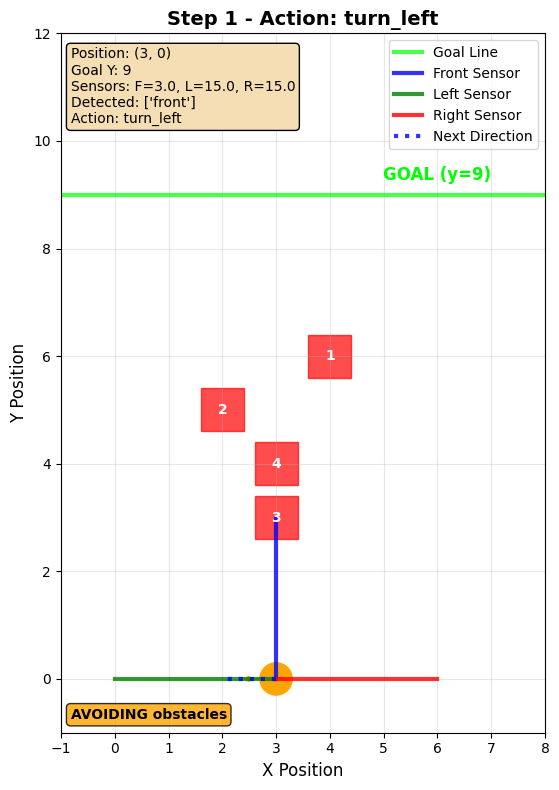

Showing Step 2


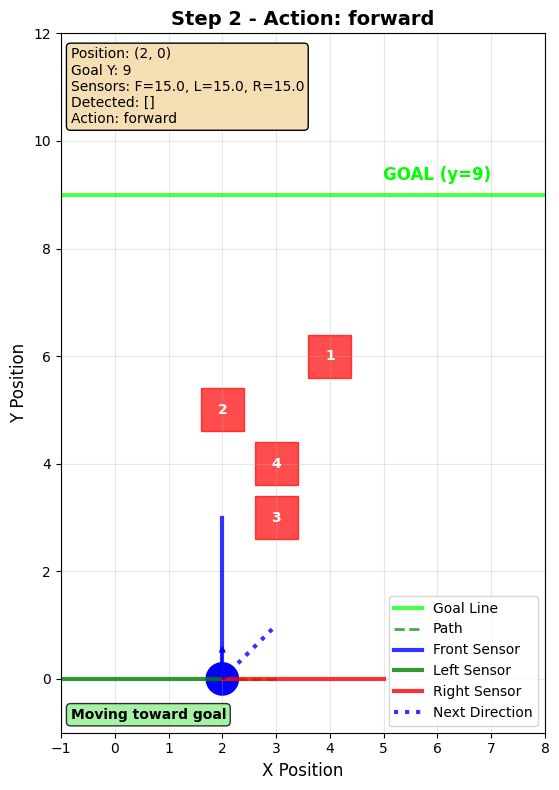

Showing Step 3


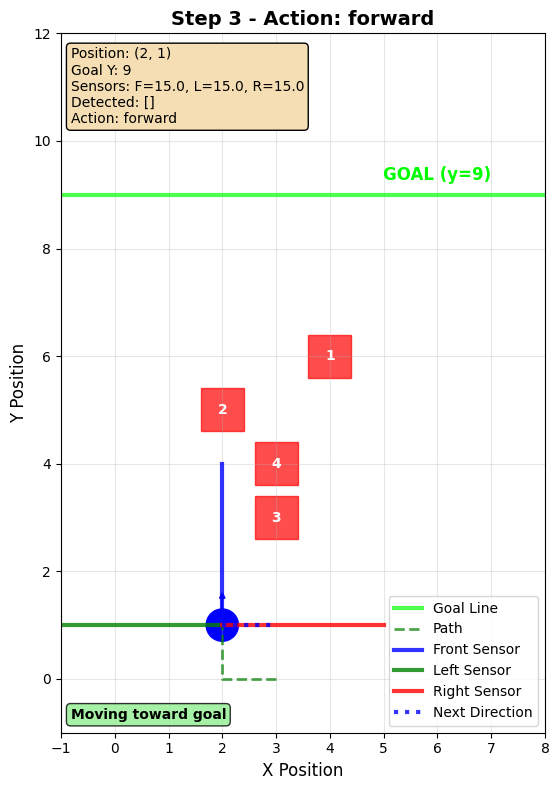

Showing Step 4


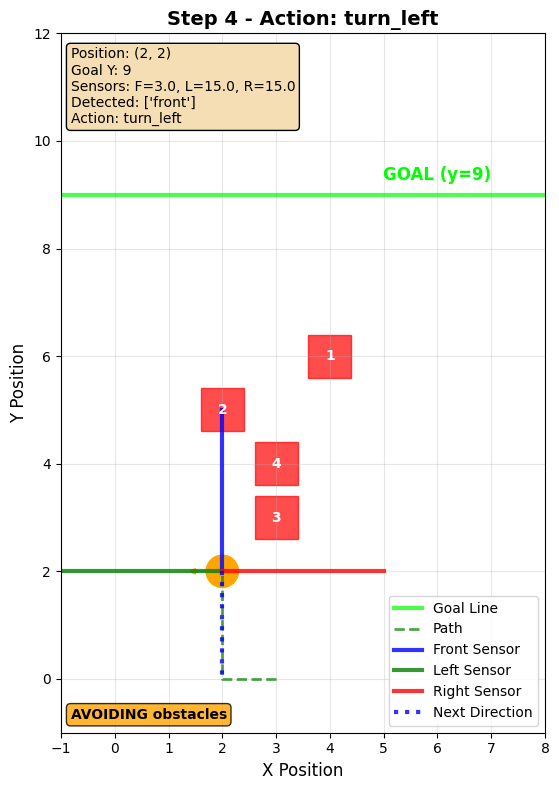

Showing Step 5


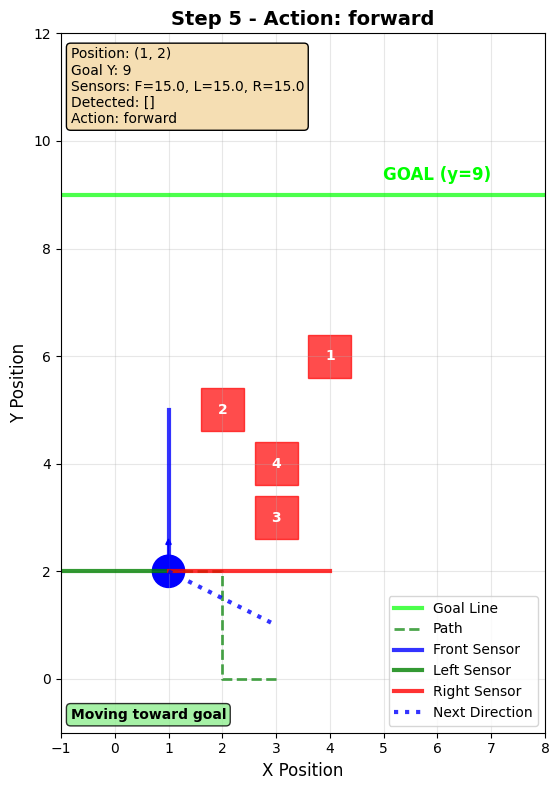

Showing Step 6


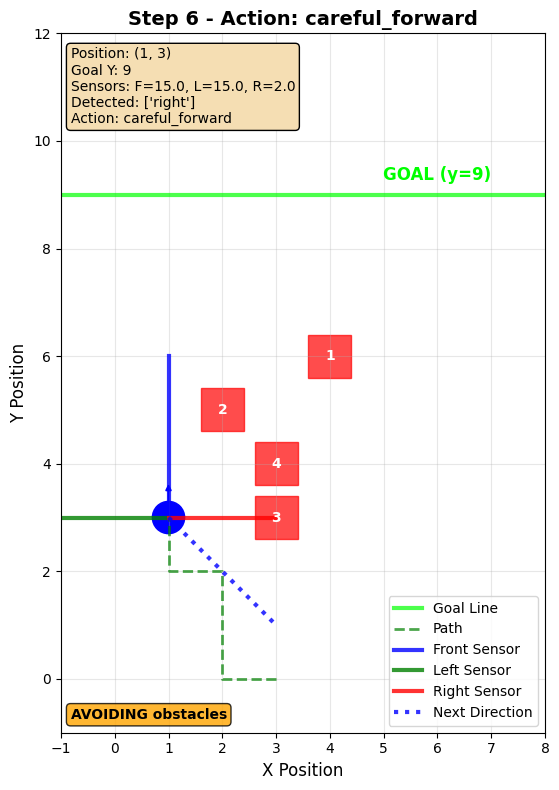

Showing Step 7


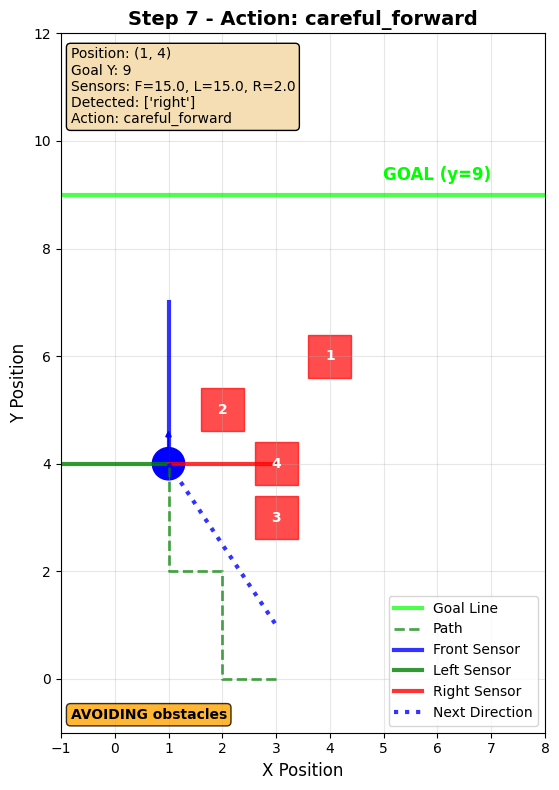

Showing Step 8


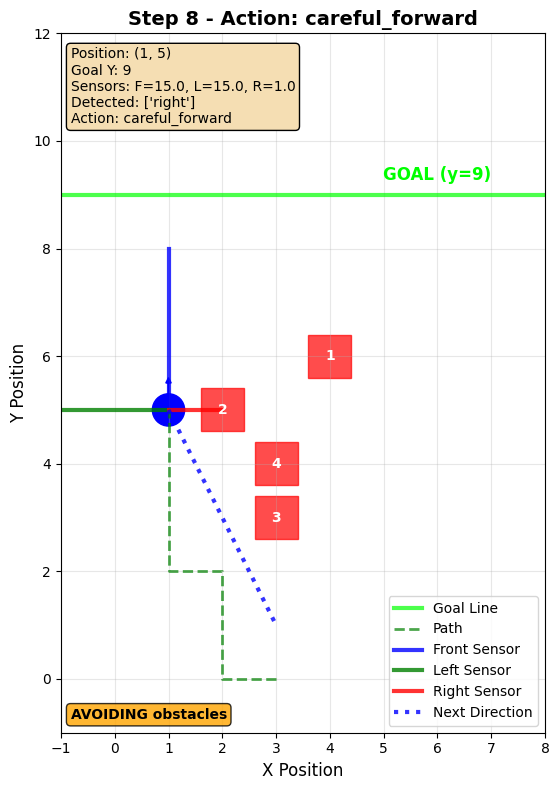

Showing Step 9


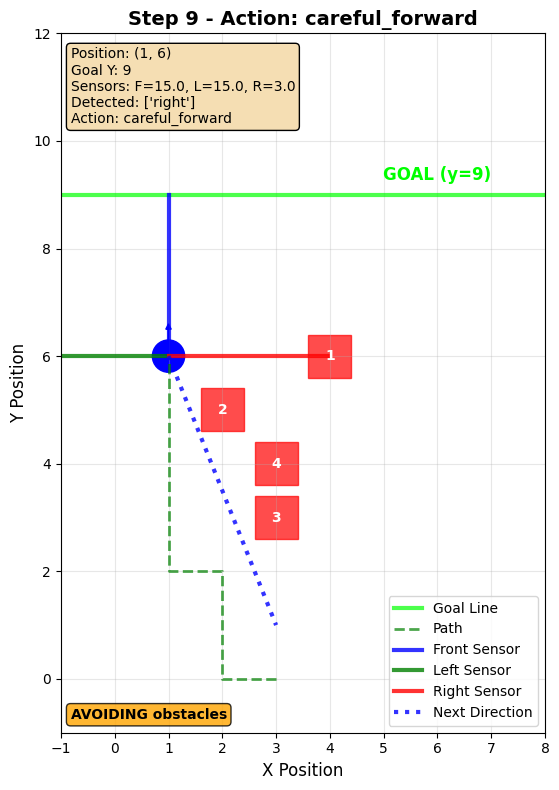

Showing Step 10


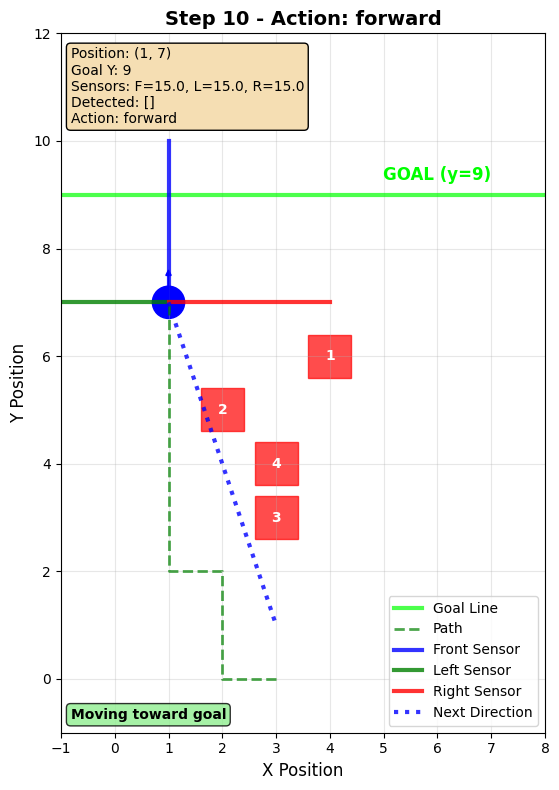

Showing Step 11


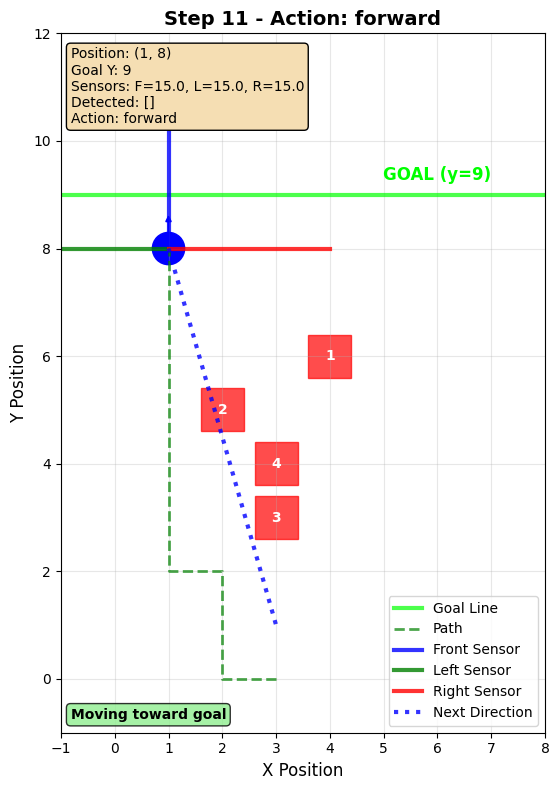

Showing Final Step - GOAL REACHED!


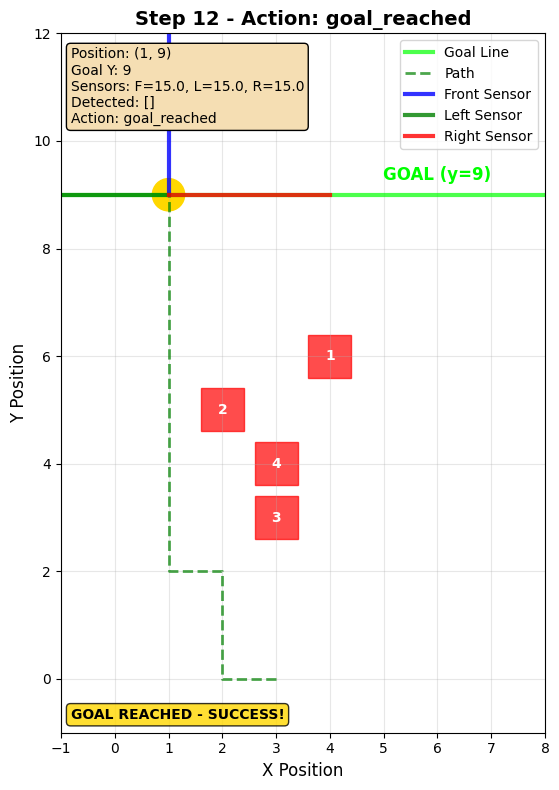

SUCCESS! Car reached the goal!
All steps completed!


In [1]:
# 3-6번 라이브러리 추가됨

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Circle
import time

# 1.  센서 초기화 함수 # 키: "front", 값: 15.0 "left", 값: 15.0  "right", 값: 15.0
def init_sensors():
    """Initialize sensor default values"""
    sensors = {
        "front": 15.0,
        "left": 15.0,
        "right": 15.0}
    return sensors

# 2. 18-25 앞쪽 스캔
def scan_front(x, y, obstacles, sensors):
    """Scan front obstacles"""
    if (x, y+1) in obstacles:
        sensors["front"] = 1.0
    elif (x, y+2) in obstacles:
        sensors["front"] = 2.0
    elif (x, y+3) in obstacles:
        sensors["front"] = 3.0
# 3. 왼쪽 스캔
def scan_left(x, y, obstacles, sensors):
    """Scan left obstacles"""
    if (x-1, y) in obstacles:
        sensors["left"] = 1.0
    elif (x-2, y) in obstacles:
        sensors["left"] = 2.0
    elif (x-3, y) in obstacles:
        sensors["left"] = 3.0
# 4. 오른쪽 스캔
def scan_right(x, y, obstacles, sensors):
    """Scan right obstacles"""
    if (x+1, y) in obstacles:
        sensors["right"] = 1.0
    elif (x+2, y) in obstacles:
        sensors["right"] = 2.0
    elif (x+3, y) in obstacles:
        sensors["right"] = 3.0
# 5.센서 데이터 업데이트 함수. 현재 위치에서 주변 장애물을 스캔하여 센서 데이터를 업데이트
def update_sensor_data(position, obstacles):
    """Update sensor data from current position"""

    x, y = position["x"], position["y"]   #   현재 위치 좌표 추출

    sensors = init_sensors()   # 2. 센서 초기화 (기본값으로 설정),{"front": 15.0, "left": 15.0, "right": 15.0}

    scan_front(x, y, obstacles, sensors)     # 3.  전방 장애물 스캔
    scan_left(x, y, obstacles, sensors)    # 3. 좌측 장애물 스캔
    scan_right(x, y, obstacles, sensors)   # 3. 오른쪽 장애물 스캔

    return sensors    # 4. 업데이트된 센서 데이터 반환
# 6. 장애물 감지 함수
def detect_obstacles(sensors, safe_distance):
    """Detect obstacles based on sensor data"""
    # 감지된 장애물 방향을 저장할 빈 리스트 생성
    detected = []
      # 각 센서의 방향과 거리를 순회
    for direction, distance in sensors.items():
         # 안전거리보다 가까우면 위험 판단
        if distance < safe_distance:
            detected.append(direction)

    return detected     #  위험한 방향들의 리스트 반환
# 7. 행동 결정 함수
def decide_action(obstacles):
    """Decide action based on detected obstacles"""

    if len(obstacles) == 0:  #  장애물이 없는 경우
        action = "forward"   # 직진
    elif "front" in obstacles:       # 전방에 장애물이 있는 경우
        if "left" not in obstacles:
            action = "turn_left"
        elif "right" not in obstacles:
            action = "turn_right"
        else:
            action = "stop"
    #  전방은 안전하지만 좌/우측에 장애물이 있는 경우
    else:
        action = "careful_forward"   # 조심스럽게 직진
    return action

# 7-1. 추가된 부분 목표지점 확인하는 코드.
def check_goal_reached(current_position, obstacle_positions):
    """Check if car reached the goal (3 units above highest obstacle)"""
    if not obstacle_positions:
        return False

    max_obstacle_y = max(pos[1] for pos in obstacle_positions)
    goal_y = max_obstacle_y + 3

    return current_position["y"] >= goal_y

# 8. 자동 시뮬레이션 클래스 class SimpleCar:를 class AutoSimulationCar: 로 변경
class AutoSimulationCar:
    def __init__(self, name, x, y):
        """Initialize car for automatic simulation"""
        self.name = name
        self.position = {"x": x, "y": y}
        self.safe_distance = 10.0
        self.path_history = [(x, y)]  #추가된 부분
        self.step_count = 0  # 추가된 부분
        self.max_steps = 15  #추가된 부
        self.simulation_data = []  # 추가된 부분 모든 스텝 데이터 저장

    def move_forward(self):
        """Move forward"""
        self.position["y"] += 1
        self.path_history.append((self.position["x"], self.position["y"]))

    def turn_left(self):
        """Turn left"""
        self.position["x"] -= 1
        self.path_history.append((self.position["x"], self.position["y"]))

    def turn_right(self):
        """Turn right"""
        self.position["x"] += 1
        self.path_history.append((self.position["x"], self.position["y"]))
    # stop부분 삭제 액션이 "stop"이면 시뮬레이션 자체가 종료되므로, 별도의 stop() 메서드가 필요하지 않습니다.

    def execute_action(self, action):
        """Execute the decided action"""
        if action == "forward" or action == "careful_forward":
            self.move_forward()
        elif action == "turn_left":
            self.turn_left()
        elif action == "turn_right":
            self.turn_right()
        # stop does nothing
    # 추가된 부분  함수는 실제로 움직이지 않고 특정 행동을 했을 때의 다음 위치를 미리 계산하는 함수
    def get_next_position(self, action):
        """Get next position without actually moving"""
         # 1. 현재 위치 좌표 가져오기
        x, y = self.position["x"], self.position["y"]

           # 2. 각 행동별 다음 위치 계산 (실제 이동 X)
        if action == "forward" or action == "careful_forward":
            return (x, y + 1)   # 위로 1칸
        elif action == "turn_left":
            return (x - 1, y)  # 왼쪽으로 1칸
        elif action == "turn_right":
            return (x + 1, y)    # 오른쪽으로 1칸
        else:   # "stop" 등 기타 행동
            return (x, y)    # 현재 위치 그대로

    #  추가된 부분시각화하는 부분
    def create_visualization(self, step_data, obstacles):
        """Create visualization for one step"""
        plt.figure(figsize=(10, 8))
        ax = plt.gca()

        ax.set_xlim(-1, 8)
        ax.set_ylim(-1, 12)  # 목표 지점을 보기 위해 y축 확장
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X Position', fontsize=12)
        ax.set_ylabel('Y Position', fontsize=12)
        ax.set_title(f"Step {step_data['step']} - Action: {step_data['action']}",
                    fontsize=14, fontweight='bold')

        # Draw goal line (3 units above highest obstacle)
        max_obstacle_y = max(pos[1] for pos in obstacles)
        goal_y = max_obstacle_y + 3
        ax.axhline(y=goal_y, color='lime', linestyle='-', linewidth=3, alpha=0.7, label='Goal Line')
        ax.text(7, goal_y + 0.2, f'GOAL (y={goal_y})', ha='right', va='bottom',
                fontweight='bold', color='lime', fontsize=12)

        # Draw obstacles
        for i, (obs_x, obs_y) in enumerate(obstacles):
            rect = Rectangle((obs_x-0.4, obs_y-0.4), 0.8, 0.8,
                           color='red', alpha=0.7)
            ax.add_patch(rect)
            ax.text(obs_x, obs_y, str(i+1), ha='center', va='center',
                   color='white', fontweight='bold')

        # Draw path
        if len(step_data['path']) > 1:
            path_x = [pos[0] for pos in step_data['path']]
            path_y = [pos[1] for pos in step_data['path']]
            ax.plot(path_x, path_y, 'g--', linewidth=2, alpha=0.7, label='Path')

        # Draw car
        x, y = step_data['position']

        # Car color based on action and goal status
        action = step_data['action']
        if step_data.get('goal_reached', False):
            car_color = 'gold'  # 목표 도달시 금색
        elif action == "stop":
            car_color = 'red'
        elif action == "turn_left":
            car_color = 'orange'
        elif action == "turn_right":
            car_color = 'purple'
        else:
            car_color = 'blue'

        car = Circle((x, y), 0.3, color=car_color)
        ax.add_patch(car)

        # Draw sensor beams
        sensors = step_data['sensors']
        sensor_length = 3
        ax.plot([x, x], [y, y + min(sensors['front'], sensor_length)],
               'b-', linewidth=3, alpha=0.8, label='Front Sensor')
        ax.plot([x, x - min(sensors['left'], sensor_length)], [y, y],
               'g-', linewidth=3, alpha=0.8, label='Left Sensor')
        ax.plot([x, x + min(sensors['right'], sensor_length)], [y, y],
               'r-', linewidth=3, alpha=0.8, label='Right Sensor')

        # Draw direction prediction (dotted line)
        if action != "stop" and not step_data.get('goal_reached', False):
            next_x, next_y = self.get_next_position(action)
            ax.plot([x, next_x], [y, next_y], 'b:', linewidth=3, alpha=0.8, label='Next Direction')

        # Draw direction arrow
        if not step_data.get('goal_reached', False):
            if action == "forward" or action == "careful_forward":
                ax.arrow(x, y, 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == "turn_left":
                ax.arrow(x, y, -0.5, 0, head_width=0.1, head_length=0.1, fc='orange', ec='orange')
            elif action == "turn_right":
                ax.arrow(x, y, 0.5, 0, head_width=0.1, head_length=0.1, fc='purple', ec='purple')

        # Display information
        info = f"Position: ({x}, {y})\n"
        info += f"Goal Y: {goal_y}\n"
        info += f"Sensors: F={sensors['front']:.1f}, L={sensors['left']:.1f}, R={sensors['right']:.1f}\n"
        info += f"Detected: {step_data['detected']}\n"
        info += f"Action: {action}"

        ax.text(0.02, 0.98, info, transform=ax.transAxes,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

        # Status message
        if step_data.get('goal_reached', False):
            status = "GOAL REACHED - SUCCESS!"
            status_color = 'gold'
        elif action == "stop":
            status = "STOPPED - All directions blocked!"
            status_color = 'red'
        elif step_data['detected']:
            status = "AVOIDING obstacles"
            status_color = 'orange'
        else:
            status = "Moving toward goal"
            status_color = 'lightgreen'

        ax.text(0.02, 0.02, status, transform=ax.transAxes, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor=status_color, alpha=0.8))

        ax.legend()
        plt.tight_layout()
        plt.show()
#  자율주행 시뮬레이션
    def run_simulation(self, obstacles):
        """Run complete simulation and collect all data"""
        print("=== Autonomous Car Automatic Simulation ===")
        print(f"Obstacles at: {list(obstacles)}")
        print("Running simulation... Each step will be displayed automatically.")
        print()

        while self.step_count < self.max_steps:
            self.step_count += 1

            print(f"--- Step {self.step_count} ---")
            print(f"Current Position: ({self.position['x']}, {self.position['y']})")

            # Update sensor data
            sensors = update_sensor_data(self.position, obstacles)
            print(f"Sensors: {sensors}")

            # Detect obstacles
            detected_obstacles = detect_obstacles(sensors, self.safe_distance)
            print(f"Detected Obstacles: {detected_obstacles}")

            # Decide action
            action = decide_action(detected_obstacles)
            print(f"Action: {action}")

            # Store step data
            step_data = {
                'step': self.step_count,
                'position': (self.position['x'], self.position['y']),
                'sensors': sensors.copy(),
                'detected': detected_obstacles.copy(),
                'action': action,
                'path': self.path_history.copy()
            }

            # Show visualization
            self.create_visualization(step_data, obstacles)

            # If stopped, end simulation
            if action == "stop":
                print("STOPPED - All directions blocked!")
                break

            # Execute action
            self.execute_action(action)
            print(f"New Position: ({self.position['x']}, {self.position['y']})")
            print()

            # Small delay for better viewing
            time.sleep(1)

        print("Simulation Complete!")

    def run_all_at_once(self, obstacles):
        """Show all steps in sequence without interaction"""
        print("=== Showing All Steps Automatically ===")
        print(f"Goal: Reach y-coordinate {max(pos[1] for pos in obstacles) + 3}")
        print("Each step will be displayed for 2 seconds")
        print()

        # Run simulation and collect data first
        steps_data = []
        temp_position = self.position.copy()
        temp_path = self.path_history.copy()

        for step in range(self.max_steps):
            step_num = step + 1

            # Check if goal is reached
            goal_reached = check_goal_reached(temp_position, obstacles)
            if goal_reached:
                print(f"GOAL REACHED at position ({temp_position['x']}, {temp_position['y']})!")
                # Add final step showing goal reached
                sensors = update_sensor_data(temp_position, obstacles)
                step_data = {
                    'step': step_num,
                    'position': (temp_position['x'], temp_position['y']),
                    'sensors': sensors.copy(),
                    'detected': [],
                    'action': "goal_reached",
                    'path': temp_path.copy(),
                    'goal_reached': True
                }
                steps_data.append(step_data)
                break

            # Update sensor data
            sensors = update_sensor_data(temp_position, obstacles)

            # Detect obstacles
            detected_obstacles = detect_obstacles(sensors, self.safe_distance)

            # Decide action
            action = decide_action(detected_obstacles)

            # Store step data
            step_data = {
                'step': step_num,
                'position': (temp_position['x'], temp_position['y']),
                'sensors': sensors.copy(),
                'detected': detected_obstacles.copy(),
                'action': action,
                'path': temp_path.copy(),
                'goal_reached': False
            }
            steps_data.append(step_data)

            # If stopped, end
            if action == "stop":
                print(f"STOPPED at position ({temp_position['x']}, {temp_position['y']}) - All directions blocked!")
                break

            # Execute action on temp position
            if action == "forward" or action == "careful_forward":
                temp_position["y"] += 1
                temp_path.append((temp_position["x"], temp_position["y"]))
            elif action == "turn_left":
                temp_position["x"] -= 1
                temp_path.append((temp_position["x"], temp_position["y"]))
            elif action == "turn_right":
                temp_position["x"] += 1
                temp_path.append((temp_position["x"], temp_position["y"]))

        # Now show all steps
        for i, step_data in enumerate(steps_data):
            if step_data.get('goal_reached', False):
                print(f"Showing Final Step - GOAL REACHED!")
            else:
                print(f"Showing Step {step_data['step']}")
            self.create_visualization(step_data, obstacles)
            if i < len(steps_data) - 1:
                time.sleep(2)  # 2초 대기

        if steps_data and steps_data[-1].get('goal_reached', False):
            print("SUCCESS! Car reached the goal!")
        else:
            print("Simulation ended.")
        print("All steps completed!")

# 실행
if __name__ == "__main__":
    # 자동차 생성
    car = AutoSimulationCar("TestCar", 3, 0)

    # 장애물 설정
    obstacles = {(3, 3), (3, 4), (2, 5), (4, 6)} # 더 멀리 배치

    print("Choose simulation mode:")
    print("1. Interactive mode (press Enter after each step)")
    print("2. Automatic mode (all steps shown automatically)")

    # 자동 모드로 실행 (웹 환경에서 가장 안정적)
    car.run_all_at_once(obstacles)